## 1. Introduction

In this codelab, you'll learn about how to use convolutional neural Networks to improve your image classification models. You'll build on the model from [lab 2](), using the convolutions learned from [lab 3]()!

## 2. Before you begin...

You'll be using TensorFlow in this lab to add convolutional layers to the top of a deep neural network (DNN) that you created in an earlier [lab]()

If you've never done this before, it's strongly recommend you use Google Colaboratory, a browser-based environment that contains all the required dependencies, including TensorFlow and the required libraries. You can find the code for the rest of this lab running in a colab [here]().

Otherwise, the main language you will use for training models is Python, so you will need to have that installed. In addition to that, you'll also need to [install TensorFlow](https://www.tensorflow.org/install). You'll also need the [numpy](https://numpy.org/) library.

## 3. Improving computer vision accuracy using convolutions

In the previous labs you saw how to do fashion image recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the input data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with several parameters that influence the final accuracy, such as different sizes of hidden layers and number of training epochs.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5015 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3789 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3379 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3138 - acc: 0.8844
Epoch 5/5
10000/10000 [==============================] - 1s 60us/sample - loss: 0.3501 - acc: 0.8699
Test loss: 0.3500947772741318, Test accuracy: 86.98999881744385


Your accuracy is probably about 89% on training and 87% on validation But how do you make that even better? One way is to use something called convolutions, which narrowsdown the content of the image to focus on specific, distinct details.

If you've ever done [image processing using a filter](https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can perform operations like edge detection. So, for example, in the image processing link, notice that a 3x3 is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has its edges enhanced.

This is perfect for computer vision, because often its features that can get highlighted like this to help distinguish one item for another. Better still, the amount of information needed is much less, because you'll train only on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers becomes more focused and possibly more accurate.


## 4. Try the Code

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [7]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

1.14.0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)        

It's likely gone up to about 93% on the training data and 91% on the validation data.

That's a significant step in the right direction!

Try running it for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to a phenomenon called 'overfitting' which we'll discuss later.

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set too well, so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suede shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the convolutions were built:

## 5. Gather the Data

**Step 1:** is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the convolutions do not recognize the shape.

In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [15]:
training_images = training_images/255.0
training_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [17]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [18]:
test_images = test_images/255.0
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## 6. Define the Model

Next is to define your model. Now instead of the input layer at the top, you're going to add a convolutional layer. The parameters are the following:

1. The number of convolutions you want to generate. A value like ‘32' is a good starting point.
2. The size of the convolutional matrix, in this case a 3x3 grid.
3. The activation function to use, in this case we'll use `relu`, which you might recall is the equivalent of returning x when x>0, else returning 0.
4. In the first layer, the shape of the input data.

You'll follow the convolution with a max-pooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. By specifying (2,2) for the max-pooling, the effect is to reduce the size of the image by a factor of 4. The idea is that it creates a 2x2 array of pixels and picks the largest pixel value, thus turning 4 pixels into 1. It repeats this computation across the image, and in so doing halves the number of horizontal pixels and halves the number of vertical pixels.

Here's the full code for the CNN:
You can call `model.summary()` to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.

In [49]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

## 7. Compile and Train the Model
Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.4451 - acc: 0.8389
Epoch 2/5
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.2964 - acc: 0.8909s - loss: 0.2966 - acc - ETA: 0s - loss: 0.2968 - 
Epoch 3/5
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.2525 - acc: 0.90710s - loss: 0.2526
Epoch 4/5
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.2230 - acc: 0.91783
Epoch 5/5
10000/10000 [==============================] - 4s 444us/sample - loss: 0.2600 - acc: 0.9048
Test loss: 0.25996214818954466, Test accuracy: 90.47999978065491


## 8. Visualize the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less information, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [29]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Now you can select some of the corresponding images for these labels and render what they look like going through the convolutions. So, in this code, FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value ‘9', an ankle boot.

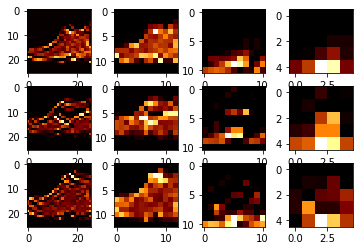

In [46]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='afmhot')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='afmhot')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='afmhot')
  axarr[2,x].grid(False)

And you should see something like this -- where the convolution is taking the essence of the ‘sole' of the shoe, effectively spotting that as a common feature across all shoes.

## 9. Exercises

Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact will this have on accuracy and/or training time?
Remove the final convolution. What impact will this have on accuracy or training time?
How about adding more convolutions? What impact do you think this will have? Experiment with it.
Remove all convolutions but the first. What impact do you think this will have? Experiment with it.
In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!